In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cd D:\Sabudh\Data

D:\Sabudh\Data


In [3]:
data=pd.read_excel('Concrete_Data.xls')

# EDA

In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# No. of unique values in each column
data.nunique()

Cement (component 1)(kg in a m^3 mixture)                280
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    187
Fly Ash (component 3)(kg in a m^3 mixture)               163
Water  (component 4)(kg in a m^3 mixture)                205
Superplasticizer (component 5)(kg in a m^3 mixture)      155
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        304
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          938
dtype: int64

In [6]:
data.info()
# no null values in our dataset
# length of dataset is 1030 and no. of features are 8
# We have to predict the Concrete compressive strength,given all the 8 components

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


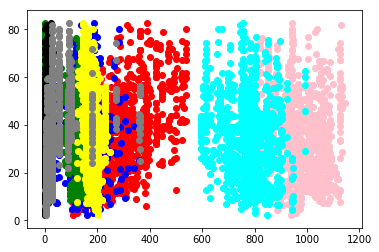

In [7]:
# Relation between all the components and the concrete strength
# It also shows the range of values of various components
plt.scatter(data['Cement (component 1)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='RED')
plt.scatter(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='BLUE')
plt.scatter(data['Fly Ash (component 3)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='GREEN')
plt.scatter(data['Water  (component 4)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='YELLOW')
plt.scatter(data['Superplasticizer (component 5)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='BLACK')
plt.scatter(data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='PINK')
plt.scatter(data['Fine Aggregate (component 7)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '],c='CYAN')
plt.scatter(data['Age (day)'],data['Concrete compressive strength(MPa, megapascals) '],c='GREY')

In [8]:
# Age compoments has the least unique values 
data['Age (day)'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

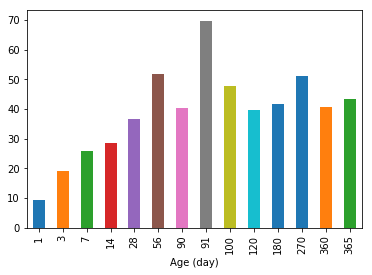

In [9]:
# mean age vs concrete strength plot 
data.groupby('Age (day)')['Concrete compressive strength(MPa, megapascals) '].mean().plot(kind='bar')

Conclusion : As age increases the concrete strength also increases but after a certain point it starts decreases

In [10]:
print(data['Cement (component 1)(kg in a m^3 mixture)'].mean())
print(data['Cement (component 1)(kg in a m^3 mixture)'].min())
print(data['Cement (component 1)(kg in a m^3 mixture)'].max())

281.165631067961
102.0
540.0


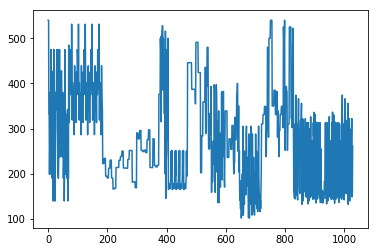

In [11]:
data['Cement (component 1)(kg in a m^3 mixture)'].plot()

# Model generation

In [4]:
#normalised data
data_n=(data-data.min())/(data.max()-data.min())
X=np.array(data_n)[:,:-1]
n=len(X)
ones_array=np.ones(n).reshape(n,1)
X=np.append(ones_array,X,axis=1)
features=X.shape[1]
Y=np.array(data_n)[:,-1].reshape(n,1)


In [5]:
alpha=0.05

In [6]:
betas=np.random.rand(features,1)
for i in range(100000):
    
    y_pred=np.dot(X,betas)
    y_difference=Y-y_pred
    y_equation=(np.transpose(y_difference))
    derivative=-2*(np.dot(y_equation,X))/n 
    betas=betas-alpha*(derivative.T)
    y_square=np.square(y_difference)
    cost_value=(np.sum(y_square))/n
    #cost_array.append(cost_value)
print(cost_value)   
print(betas)
    


0.01664041016790856
[[-0.06317762]
 [ 0.65375527]
 [ 0.46509168]
 [ 0.21930651]
 [-0.2343674 ]
 [ 0.11664311]
 [ 0.07737421]
 [ 0.10022464]
 [ 0.51799906]]


# with sklearn

In [52]:
import sklearn
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
D=np.array(data)
y=np.array(data)[:,-1].reshape(n,1)
regressor.fit(D[:,:-1],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print(regressor.intercept_)
print(regressor.coef_)

[-23.16375581]
[[ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
   0.02015446  0.11422562]]


In [54]:
Y_pred=regressor.predict(D[:,:-1])

In [42]:

sklearn.metrics.mean_squared_error(y,Y_pred)

107.21180273450534

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
D=np.array(data_n)
y=np.array(data_n)[:,-1].reshape(n,1)
regressor.fit(D[:,:-1],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
Y_pred=regressor.predict(D[:,:-1])

In [9]:
sklearn.metrics.mean_squared_error(y,Y_pred)

0.016640410041922155

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[-0.06289088]
[[ 0.65363934  0.46497947  0.21923479 -0.2345262   0.1166117   0.07727149
   0.10008502  0.51799506]]
